## Comparisons to other methods (speed, accuracy)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
X = np.loadtxt("Data/mnist2500_X.txt")
labels = np.loadtxt("Data/mnist2500_labels.txt")

### Our Package (Reference)

In [3]:
from tsne.tsne import TSNE, TSNE_plot

train1 = StandardScaler().fit_transform(X)
tsneout = PCA(n_components=50).fit_transform(train1)

yout = TSNE(tsneout)

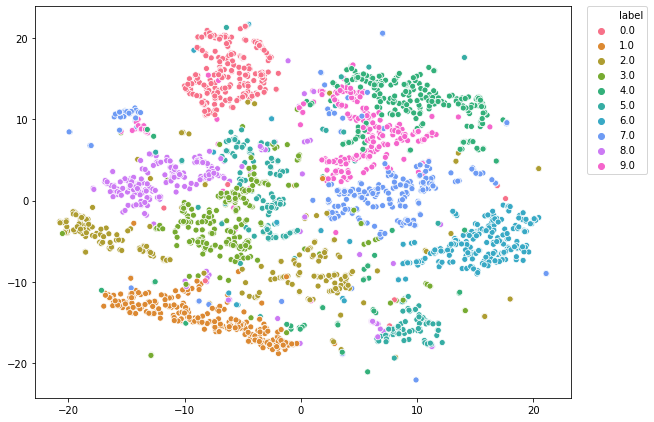

In [4]:
our_plot = TSNE_plot(yout, labels)
#our_plot.savefig("Report/Report_Plots/our_plot_MNIST.png")


In [5]:
our_time = %timeit -o -r3 -n3 TSNE(tsneout)

13min 5s ± 13.1 s per loop (mean ± std. dev. of 3 runs, 3 loops each)


### PCA

Popular linear dimensionality reduction methods include PCA, or Principal Components Analysis, and MDS, Multi-Dimensional Scaling. However, issues arise in applications where low-dimensional representations of similar points must be kept close together, because these methods prioritize keeping low-dimensional representations of dissimilar points far apart. To avoid this concern and preserve local data structures, non-linear dimensionality reduction methods have been proposed as well, one of which, Stochastic Neighbor Embedding, forms the basis of this paper. 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
train = StandardScaler().fit_transform(X)
pca_res = PCA(n_components=2).fit_transform(train)

In [8]:
PCA_time = %timeit -o -r3 -n3 PCA(n_components=2).fit_transform(train)

113 ms ± 20.2 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


Text(0.5, 1.0, 'PCA n=2 on MNIST data')

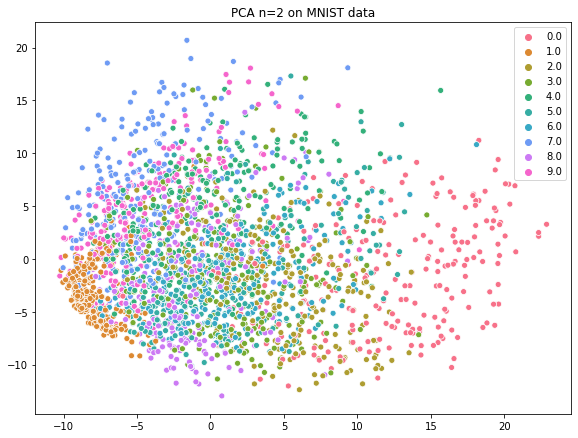

In [9]:
plt.figure(figsize=(9.6,7.2))
plot_PCA = sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue =  labels, palette = sns.color_palette("husl", 10)).get_figure()
plt.title('PCA n=2 on MNIST data')
#plot_PCA.savefig("Report/Report_Plots/PCA_MNIST_plot.png")

### Isomap

In [10]:
from sklearn.manifold import Isomap

In [11]:
iso_res = Isomap(n_components=2).fit_transform(train)

Text(0.5, 1.0, 'Isomap n=2 on MNIST data')

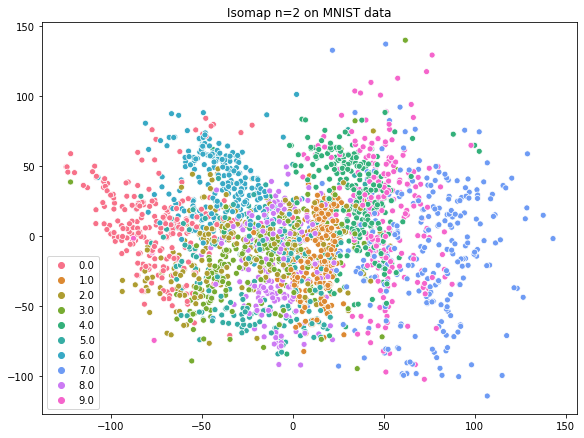

In [12]:
plt.figure(figsize=(9.6,7.2))
plot_iso = sns.scatterplot(x = iso_res[:,0], y = iso_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('Isomap n=2 on MNIST data')
#plot_iso.savefig("Report/Report_Plots/Isomap_MNIST_plot.png")



In [13]:
Iso_time = %timeit -o -r3 -n3 Isomap(n_neighbors = 10, n_components=2).fit_transform(train)

14.4 s ± 136 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### LLE: Local Linear Embedding

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

In [15]:
lle_res = LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

Text(0.5, 1.0, 'Locally Linear Embedding n=2 on MNIST data')

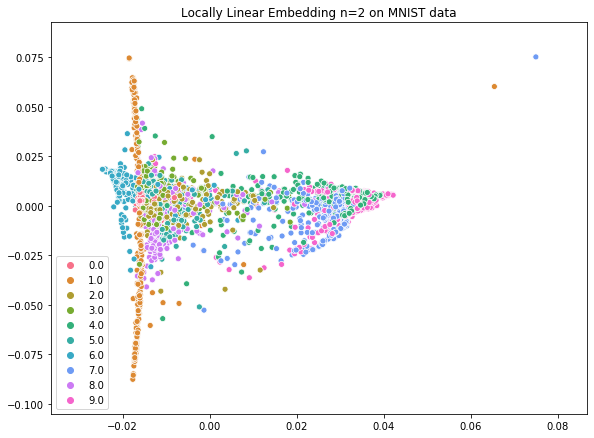

In [16]:
plt.figure(figsize=(9.6,7.2))
plot_lle = sns.scatterplot(x = lle_res[:,0], y = lle_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('Locally Linear Embedding n=2 on MNIST data')
#plot_lle.savefig("Report/Report_Plots/LLE_MNIST_plot.png")


In [17]:
lle_time = %timeit -o -r3 -n3 LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

14.1 s ± 634 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### Neighborhood Components Analysis

In [18]:
from sklearn import neighbors


In [19]:
nca_res = neighbors.NeighborhoodComponentsAnalysis(init='random',
                                               n_components=2, random_state=0).fit_transform(train, labels)


Text(0.5, 1.0, 'NCA n=2 on MNIST data')

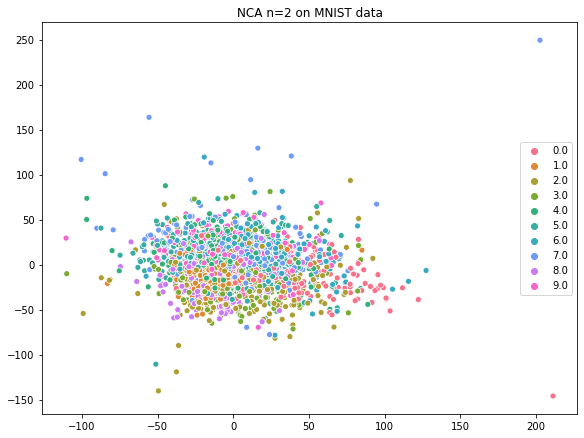

In [20]:
plt.figure(figsize=(9.6,7.2))
plot_nca = sns.scatterplot(x = nca_res[:,0], y = nca_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('NCA n=2 on MNIST data')
#plot_nca.savefig("Report/Report_Plots/NCA_MNIST_plot.png")


In [21]:
nca_time = %timeit -o -r3 -n3 neighbors.NeighborhoodComponentsAnalysis(init='random', n_components=2, random_state=0).fit_transform(train, labels)


1min 7s ± 998 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### MDS

In [22]:
from sklearn.manifold import MDS

In [23]:
mds_res = MDS(n_components=2).fit_transform(train)

Text(0.5, 1.0, 'MDS n=2 on MNIST data')

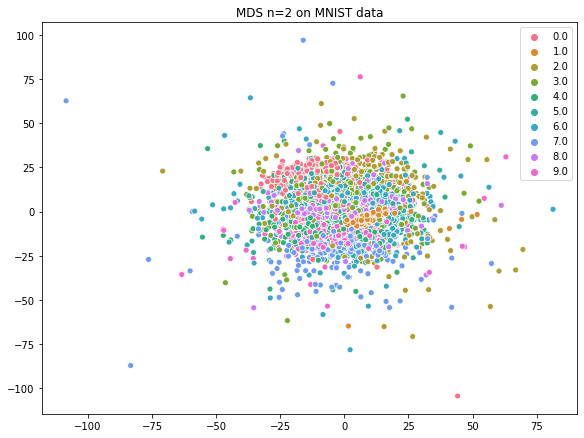

In [24]:
plt.figure(figsize=(9.6,7.2))
plot_mds = sns.scatterplot(x = mds_res[:,0], y = mds_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('MDS n=2 on MNIST data')
#plot_mds.savefig("Report/Report_Plots/MDS_MNIST_plot.png")



In [25]:
mds_time = %timeit -o -r3 -n3 MDS(n_components=2).fit_transform(train)


36min 55s ± 12min 30s per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [26]:
# speed up multiplier
# run this after you time normal with package

types = [PCA_time, lle_time, Iso_time, nca_time, mds_time, our_time]
time = list(map(lambda x: np.round(x.average,3), types))

import pandas as pd

speed_table_comp = pd.DataFrame(time, index = ['PCA', 'LLE', 'Isomap', 'NCA', 'MDS', 'our t-SNE package'], columns = ["Time Comparison (seconds)"])
speed_table_comp

,Time Comparison (seconds)
PCA,0.113
LLE,14.108
Isomap,14.394
NCA,67.810
MDS,2215.406
our t-SNE package,785.343


In [27]:
speed_table_comp.to_csv("comparison_speed_table.csv")